In [1]:
from __future__ import division
import numpy as np
import corner

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib as mpl

from matplotlib import rcParams
rcParams["font.size"] = 16
rcParams["font.family"] = "serif"
rcParams["axes.labelsize"] = 25
mpl.rcParams['text.usetex'] = True


In [2]:
Msun = 1.9885469549614615*10**30
G = 6.67408*10**(-11)
cc = 299792458

def Mjfinal220(omega220,tau220):
    
    jf=1-pow((omega220*tau220/2.-0.7)/(1.4187),-1/0.4990)
    Mf=((1.5251 - 1.1568*pow((1 - jf),0.1292))/omega220)*(cc*cc*cc/G/Msun)

    return Mf,jf


In [3]:
def omegaQNMGR(Mf,af):
    
    omegaGR=(1.5251 - 1.1568*pow((1 - af),0.1292))/(Mf*Msun*G/cc**2/cc)
    tauGR=1/((1/2)*(omegaGR/(0.7000 + 1.4187*pow((1 - af),-0.4990))))

    return omegaGR,tauGR

In [ ]:
params=['reomegaqnm_a','imomegaqnm_a','reomegaqnm_b','imomegaqnm_b','mf']
data=np.genfromtxt('/Users/richardbrito/Desktop/Projects/IMR-QNM/data/GW150914/lalinferencemcmc/EOBNRv2HMpseudoFourPN/1126259462.43-190276/H1L1/posterior_samples.dat', names=True)

XEOBv2 = data[params]

paramsLVC=['mf','af']
dataLVCsamples=np.genfromtxt('/Users/richardbrito/Desktop/Projects/IMR-QNM/data/GW150914/overall_post.dat', names=True)
XLVC = dataLVCsamples[paramsLVC]

In [ ]:
MJ=Mjfinal220(XEOBv2['reomegaqnm_a']/(XEOBv2['mf']*Msun*G/(cc**2)/cc),
           XEOBv2['mf']*Msun*G/(cc**2)/cc/XEOBv2['imomegaqnm_a'])

In [ ]:
qnmmodes = np.vstack([MJ[0][(MJ[1]>0) & (MJ[1]<1)],
                      MJ[1][(MJ[1]>0) & (MJ[1]<1)]])

IMR = np.vstack([XLVC['mf'],XLVC['af']])


In [ ]:
fig = corner.corner(np.transpose(qnmmodes),
                    labels=[r'$M$',
                            r'$j$'],
                    smooth=True,color='blue',truth_color='grey',bins=50,
                    plot_contours=True,levels=([0.9]),
                    truths=[68.5,0.69],range=([50,100],[0,1]),plot_datapoints=False)

corner.corner(np.transpose(IMR),
                    labels=[r'$M$',
                            r'$j$'],
                    smooth=True,color='black',bins=50,
                    plot_contours=True,levels=([0.9]),
                    range=([50,100],[0,1]),plot_datapoints=False,fig=fig)



plt.minorticks_on()

fig.show()

## S190521

In [4]:
params_ring=['domega220','dtauinv220','mf','af']
params_insp=['mf','af']

data_ring=np.genfromtxt('/home/abhirup.ghosh/Documents/Work/O3/2019/May/21/1242442967p4500/G333631/lalinference/20190525_pSEOBNRv4HM_domega220_dtauinv220/cbcBayes/posterior_samples.dat', names=True)
data_insp=np.genfromtxt('/home/abhirup.ghosh/Documents/Work/O3/2019/May/21/1242442967p4500/G333631/lalinference/20190525_SEOBNRv4_ROM_IMRCT/inspiral_50Hz/1242442967.45-333631/V1H1L1/posterior_samples.dat', names=True)

XSEOBv4_ring = data_ring[params_ring]
XSEOBv4_insp = data_insp[params_insp]

In [5]:
omegaGR0=omegaQNMGR(XSEOBv4_ring['mf'],XSEOBv4_ring['af'])[0]
tauGR0=omegaQNMGR(XSEOBv4_ring['mf'],XSEOBv4_ring['af'])[1]

In [6]:
MJ=Mjfinal220(omegaGR0*(1+XSEOBv4_ring['domega220']),
           tauGR0*(1+XSEOBv4_ring['dtauinv220']))

/.auto/home/abhirup.ghosh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


In [7]:
mfaf_ring = np.vstack([MJ[0][(MJ[1]>0) & (MJ[1]<1)],
                      MJ[1][(MJ[1]>0) & (MJ[1]<1)]])

mfaf_insp = np.vstack([XSEOBv4_insp['mf'],XSEOBv4_insp['af']])


/.auto/home/abhirup.ghosh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/.auto/home/abhirup.ghosh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/.auto/home/abhirup.ghosh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/.auto/home/abhirup.ghosh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


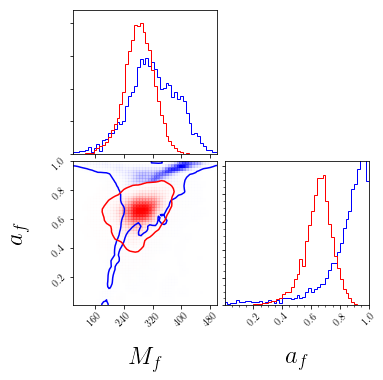

In [9]:
fig = corner.corner(np.transpose(mfaf_ring),
                    labels=[r'$M_f$',
                            r'$a_f$'],
                    smooth=True,color='blue',truth_color='grey',bins=50,
                    plot_contours=True,levels=([0.9]),range=([100,500],[0,1]),plot_datapoints=False)


corner.corner(np.transpose(mfaf_insp),
                    labels=[r'$M_f$',
                            r'$a_f$'],
                    smooth=True,color='red',bins=50,
                    plot_contours=True,levels=([0.9]),
                    plot_datapoints=False,range=([100,500],[0,1]),fig=fig)


plt.minorticks_on()

fig.show()

In [ ]:
IMR = np.vstack([XSEOBv4['mf'],XSEOBv4['af'],XSEOBv4['domega220'],XSEOBv4['dtauinv220']])

corner.corner(np.transpose(IMR),
                    labels=[r'$M$',
                            r'$j$',r'$d\omega_{220}$',r'$d\tau_{220}$'],
                    smooth=True,color='blue',truth_color='grey',bins=50,
                    plot_contours=True,levels=([0.9]),
                    plot_datapoints=False)
plt.show()